# Isohyet Map
July 2020, L. Duffar
https://github.com/loicduffar

This python notebook create a isohyet map (isovalues) from precipitation data at several raingauges.

The data should be stored by column in an excel file (with header row): raingauge NAME in one column, coordinates (longitude/latitude in decimal degrees) in 2 columns, precipitation data (one column for each event day/month/year). Missing values are allowed (blank cell or non numeric value).

- 1) Run the 1rst cell below to read and display the precipitation data for one or several events (hour/day/month/year)
- 2) Run the 2nd cell (Interpolate on a grid) to compute the interpolated precipitation on a fine rectangular grid
- 3) Run the 3rd cell (Map) to plot the contour map with or without watersed(s)

## 1) Data reading from Excel, and building/displaying a dataframe
- Specify the name / path of the exel file, and the sheet of the data (e.g. sheet_name="Data")
- Specify the range of row indexes to skip (index starting from 0, ending value excluded) e.g. skiprows=range(0, 5) in order to skip rows 0 to 4 (5 rows)
- Specify the header of the column containing the raingauge name (e.g. index_col='NAME')
- Specify the column indexes to read, including the raingauge name (e.g. cols= [0,1,2,3,4,10,11,18,19,37,38])

In [1]:
"""
Created on Jul 2020
@author: Loïc Duffar
"""
import pandas as pd
import os
from IPython.display import display
import matplotlib.pyplot as plt
import plotly.express as px
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
pd.set_option("display.max_rows", None, "display.max_columns", None)

# --------------- Data read
path= r"C:\Users\duffar\Documents\A\ETUDES\HYDROLOGIE\Pluies & Crues dommage & Retour d'experience\2019 PACA\Nov Dec PACA\Pluie".replace('\\','/')
file_in= os.path.join(path, 'PJ_Concession SCP 20 Nov au 21 Dec 2019.xlsx')
cols= [0,1,2,3,4,10,11,18,19,37,38]
df = pd.read_excel(file_in, sheet_name="PJ Nov-Dec", skiprows=range(0, 5), index_col='NAME', usecols=cols)

display(df)

,STATION,LON,LAT,ALTITUDE,2019-11-22 00:00:00,2019-11-23 00:00:00,2019-11-30 00:00:00,2019-12-01 00:00:00,2019-12-19 00:00:00,2019-12-20 00:00:00
NAME,,,,,,,,,,
BEVONS,4027002,5.8618,44.1670,520,36.1,69.6,27.3,99.4,33.2,114.6
CERESTE,4045001,5.5660,43.8506,350,61.5,71.3,12.2,-,18,94.9
ST AUBAN,4049001,5.9896,44.0621,458,10.9,50.0,2.4,94,3,45.6
CHATEAUNEUF-MIRAVAIL,4051001,5.7266,44.1618,660,47.0,70.1,28.2,62.4,54.3,70.6
DAUPHIN,4068001,5.7671,43.9098,427,25.6,50.3,4.8,95.1,9,75.7
FORCALQUIER,4088001,5.7846,43.9628,535,36.5,62.0,7.8,118.1,12.6,81.2
LARDIERS,4101001,5.7135,44.0523,747,53.4,67.4,18,84.3,32.1,80.1
MANOSQUE-PIMARLET,4112010,5.8010,43.8370,375,30.0,60.0,3.8,-,1.8,58
QUINSON,4158002,6.0398,43.7075,400,57.0,58.0,1.7,-,11.3,50


## 2) Interpolate precipitations on a evenly spaced grid from from rain gauges measurements
- Specifiy the header of the column containing the longitude and latitude cordinates (e.g. LON = 'LON' and
LAT = 'LAT')
- Specify the desired column index (starting from 0) in the table displayed above (e.g. col = 5 stands for the 6th column)
- If needed, change the interpolate method (e.g. method='cubic' or 'linear')
- Run the cell below (provided the data are already read)

In [2]:
"""
Created on Jul 2020
@author: Loïc Duffar
"""
from scipy.interpolate import griddata
import numpy as np

LON = 'LON'
LAT = 'LAT'
col = 5
x = df[LON].values
y = df[LAT].values
COL = df.columns[col]
z = df[COL].values
xx = np.linspace(df[LON].min(), df[LON].max(), 200)
yy = np.linspace(df[LAT].min(), df[LAT].max(), 200)
xi, yi = np.meshgrid(xx, yy)
zi = griddata( (x,y), z, (xi,yi), method='cubic', fill_value=np.NaN )# method='cubic' or 'linear'

## 3) Plot Map of the isovalue contours (Libraries Matplotlib+Cartopy)
- Choose the plot options (e.g. fill_contours = True, plot_raingauges = True, raingauge_name = True, shape_files = True)
- If needed, specify the shape file name and path to plot, witout extension (e.g. path=r"C:/..." and shp_file = '_temp')
- Run the cell below to plot the contour map (provided the data are already read and interpolated onto the evenly spaced grid)

WARNING: at the first run of this cell, the execution takes several minutes (only because of the ocean coloring). Please be patient, and the next execution will be very fast !

Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.
C:\Users\DUFFAR\AppData\Local\Continuum\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


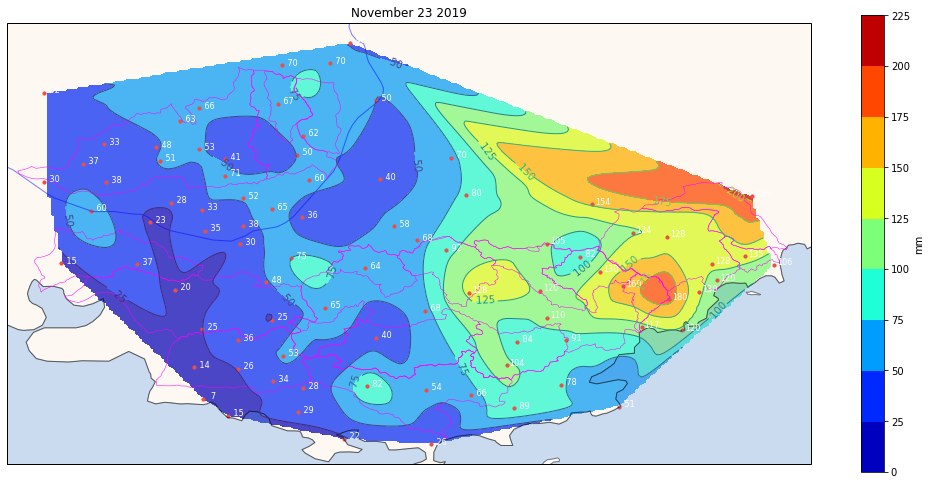

In [3]:
"""
Created on Jul 2020
@author: Loïc Duffar
"""
#%matplotlib notebook  # Only needed to allow dragging of raingauges names
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy
import cartopy.feature as cfeature
import datetime
#from cartopy.io.img_tiles import Stamen
import os
os.environ['GDAL_DATA'] = r'C:\Users\DUFFAR\AppData\Local\Continuum\anaconda3\Library\share\gdal'
# https://stackoverflow.com/questions/45883445/how-to-fix-the-enviroment-variable-gdal-data-path-set

#--------------- Plot options
fill_contours = True
plot_raingauges = True
raingauge_name = False
shape_files = True
#--------------- Plot and map setup
frac = 20
x_ext = (df[LON].max() - df[LON].min()) / frac
y_ext = (df[LAT].max() - df[LAT].min()) / frac
proj = cartopy.crs.PlateCarree()
fig = plt.figure(figsize=(18, 14))
ax = fig.add_subplot(projection= proj)
ax.set_extent([df[LON].min()-x_ext, df[LON].max()+x_ext, df[LAT].min()-y_ext, df[LAT].max()+y_ext], crs=proj)
#--------------- plot contours and rain gauges
if fill_contours:
    cs1 = plt.contourf(xi, yi, zi, cmap=plt.cm.jet, alpha=1)# contour fills
cs2 = plt.contour(xi, yi, zi, linewidths=1)# contour allows to plot contour lines (contourf does not) 
#cs1 = plt.tricontourf(x, y, z, cmap=plt.cm.jet, alpha=0.9)# tricontour(f) does not require structured rectangular grid
#cs2 = plt.tricontour(x, y, z, linewidths=1)# tricontour allows to plot contour lines (tricontourf does not)
plt.clabel(cs2, fontsize=10, fmt='%4d', inline=True)
cb = plt.colorbar(cs1, shrink=0.6)
cb.set_label('mm')
if plot_raingauges:
    plt.scatter(x,y, s=10, color='red')
    for  i in range(0,len(x)):
        if raingauge_name:
            text = df.index[i] + '\n' + '{:3.0f}'.format(df.iloc[i][col])
        else:
            text = '{:3.0f}'.format(df.iloc[i][col])
        plt.annotate(text, (x[i],y[i]), xytext=(3,0), textcoords='offset points', fontsize=8, color='white', 
                     arrowprops=dict(arrowstyle='-', color='grey') ).draggable()
#--------------- Map wrapping (NaturalEarth)
res = '10m' # 10m, 50m or 110m (10m = 1/ 10 000 000)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', res, facecolor='antiquewhite', edgecolor='black'),
                alpha=0.3)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', res, facecolor='none', 
                edgecolor='blue'), alpha=0.5)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'rivers_europe', res, facecolor='none', edgecolor='blue'))
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'lakes', res, facecolor=cfeature.COLORS['water'], edgecolor='blue'), 
                alpha=0.5)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', res, facecolor=cfeature.COLORS['water'], edgecolor='black'), 
                alpha=0.5)
#ax.add_feature(cfeature.NaturalEarthFeature('physical', 'coastlines', res, facecolor='none', edgecolor='black'))
#ax.coastlines(resolution=res)
text = COL
if isinstance(COL, int): text = COL.strftime("%6d")
if isinstance(COL, float): text = COL.strftime("%6.2f")
if isinstance(COL, datetime.datetime): text = COL.strftime("%B %d %Y")
plt.title(text, loc='center')
#--------------- plot shape files
if shape_files:
    path = r"C:\Users\duffar\Documents\A\ETUDES\carto\_Shapefiles à regouper"
    shp_file = '_temp.shp'
    shp_path = os.path.join(path, shp_file)
    shp = cartopy.io.shapereader.Reader(shp_path)
    ax.add_geometries(shp.geometries(), proj, facecolor='none', edgecolor='magenta', linewidth=0.5)
#--------------- Save map to file
if isinstance(COL, datetime.datetime): text = COL.strftime("%Y %m %d")
plt.savefig('isohyet map ' + text, dpi=150)